# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19()
vgg19.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg


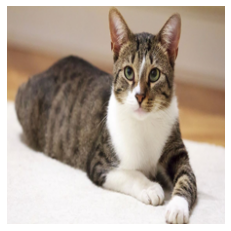

In [5]:
import matplotlib.pyplot as plt

img = Image.open('cat.jpg').resize((224,224))
plt.imshow(img), plt.axis("off");

- 이미지 예측

In [7]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.57871205),
   ('n02123045', 'tabby', 0.32011372),
   ('n02123159', 'tiger_cat', 0.098547764),
   ('n04040759', 'radiator', 0.00047500042),
   ('n02127052', 'lynx', 0.00045133987)]])

In [8]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.57871205)

In [9]:
# VGG19
yhat = vgg19.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.7138556)

- 이미지를 224 X  224 사이즈로 자르기

In [10]:
img = Image.open('cat.jpg')
h, w, _ = np.array(img).shape  # c는 필요 없지. 
h, w, 
# 쌤은 (448, 680)  나는 (427, 640)   작은 쪽을 조정해서 

(448, 680)

In [11]:
if h > w:
    width, height = 244, (h * 224)//w
else:
    width, height = (w * 224) // h,  224
height, width

(224, 340)

In [12]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(224, 340, 3)

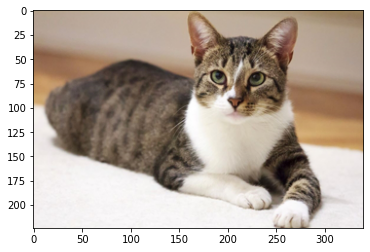

In [13]:
plt.imshow(new_img);

In [14]:
diff = abs(width - height)//2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

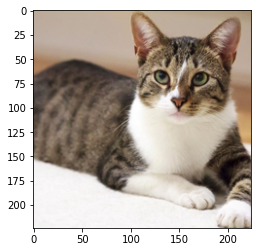

In [15]:
plt.imshow(final_img)

In [16]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h*IMAGE_SIZE)//w
    else:
        width, height = (w*IMAGE_SIZE)//h, IMAGE_SIZE

    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]
    return final_img

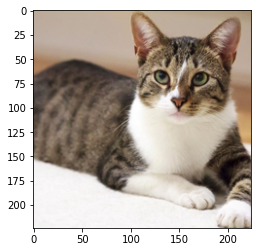

In [18]:
img = Image.open('cat.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [19]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.56075007)

In [20]:
yhat = vgg19.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.6335459)